# PREPARATION OF THE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## CLEANING THE WEATHER DATA

In [13]:
weather_data = pd.read_excel("Whether station data/2018_RaBT-1_030418-to-311218.xlsx")
weather_data.head()

,Date & Time,Temp - °C,Wind Speed - km/h,Wind Direction,Rain - mm,Rain Rate - mm/h
0,NaT,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN
3,2018-04-03 16:00:00,7.9,0.0,NaN,0.0,0.0
4,2018-04-03 17:00:00,7.2,0.0,NaN,0.0,0.0


In [14]:
weather_data = weather_data.drop([0,1,2])
weather_data.drop(weather_data.columns[[1, 3]],axis = 1, inplace = True)
weather_data.head()

,Date & Time,Wind Speed - km/h,Rain - mm,Rain Rate - mm/h
3,2018-04-03 16:00:00,0.0,0.0,0.0
4,2018-04-03 17:00:00,0.0,0.0,0.0
5,2018-04-03 18:00:00,1.6,0.0,0.0
6,2018-04-03 19:00:00,1.6,0.0,0.0
7,2018-04-03 20:00:00,1.6,0.0,0.0


In [15]:
weather_data.apply(lambda x: sum(x.isnull()), axis=0)

Date & Time            0
Wind Speed - km/h    611
Rain - mm              0
Rain Rate - mm/h       0
dtype: int64

In [16]:
weather_data = weather_data.fillna(weather_data.mean())
weather_data.apply(lambda x: sum(x.isnull()), axis=0)

Date & Time          0
Wind Speed - km/h    0
Rain - mm            0
Rain Rate - mm/h     0
dtype: int64

In [17]:
weather_data['Date'] = [d.date() for d in weather_data['Date & Time']]
weather_data.head()

,Date & Time,Wind Speed - km/h,Rain - mm,Rain Rate - mm/h,Date
3,2018-04-03 16:00:00,0.0,0.0,0.0,2018-04-03
4,2018-04-03 17:00:00,0.0,0.0,0.0,2018-04-03
5,2018-04-03 18:00:00,1.6,0.0,0.0,2018-04-03
6,2018-04-03 19:00:00,1.6,0.0,0.0,2018-04-03
7,2018-04-03 20:00:00,1.6,0.0,0.0,2018-04-03


## CLEANING THE LANDSLIDE DATA

In [18]:
landslide_data = pd.read_excel("Landslide.xlsx")
landslide_data.head()

,No,Mapped,Road_closure,Info_Source,Year,Season,Slope_Position,Date_Range,Date_For_Plotting,Time,...,NGR,Latitude,Longitude,source_vol (m^2),source_depth\n(m),deposit_vol (m^2),Deposit_width (m),deposit_depth (m),mass_tonnes,Material
0,1,No,Yes,"Winter et al., 2010",2003,2002-2003,NaN,2003-01-25 00:00:00,2003-01-25 00:00:00,NaN,...,NN 235 071,NaN,NaN,-,-,-,-,-,-,-
1,2,No,Yes,"Winter et al., 2010",2003,2003-2004,NaN,2003-11-29 00:00:00,2003-11-29 00:00:00,NaN,...,NN 234 072,NaN,NaN,-,-,-,-,-,-,-
2,3,No,Yes,"Winter et al., 2010",2004,2003-2004,NaN,2004-01-19 00:00:00,2004-01-19 00:00:00,NaN,...,NN 235 070,NaN,NaN,-,-,-,-,-,-,-
3,4,Yes,Yes,BGS poster,2007,2007-2008,Mid,2007-10-28 00:00:00,2007-10-28 00:00:00,03:00:00,...,NN23828 07142,-4.842029,56.224098,300,NaN,227,25,2.5,NaN,Till
4,5,Yes,No,TranServ annual report,2008,2007-2008,Mid,2008-04-02 00:00:00,2008-04-02 00:00:00,NaN,...,"224300E, 706700N\nDifferent to shapefile from ...",-4.832551,56.220047,50,NaN,2.3,5,NaN,5,Silt and Clay


In [19]:
landslide_data.drop(landslide_data.columns[[0,1,2,3,4,5,6,8,10,12,13,14,15,16,17,18,19,20,21,22,23,24]], axis = 1, inplace = True)
landslide_data.head()

,Date_Range,Time,Type
0,2003-01-25 00:00:00,NaN,NaN
1,2003-11-29 00:00:00,NaN,NaN
2,2004-01-19 00:00:00,NaN,NaN
3,2007-10-28 00:00:00,03:00:00,CDF
4,2008-04-02 00:00:00,NaN,CDF


## CREATING FINAL DATA AND PREPARING IT FOR MACHINE LEARNING AND DEEP LEARNING MODELS

In [20]:
import datetime

In [21]:
def dateRange(s,e,d):
    start = datetime.datetime.strptime(s, "%Y-%m-%d")
    end = datetime.datetime.strptime(e, "%Y-%m-%d")
    date_array = \
    (start + datetime.timedelta(days=x) for x in range(0, (end-start).days))
    for date_object in date_array:
        d.append(date_object.strftime("%Y-%m-%d"))
    return d

In [22]:
days = []
start = "2018-04-03"
end = "2018-05-26"
days = dateRange(start, end, days)
days.append("2018-09-20")
days.append("2018-09-10")
start = "2018-10-08"
end = "2018-10-10"
days = dateRange(start, end, days)
days.append("2018-10-12")
start = "2018-11-27"
end = "2018-11-30"
days = dateRange(start, end, days)
start = "2018-11-10"
end = "2018-11-13"
days = dateRange(start, end, days)
start = "2018-12-17"
end = "2018-12-19"
days = dateRange(start, end, days)

In [23]:
final_data = weather_data.assign(Landslides=0)
final_data.head()

,Date & Time,Wind Speed - km/h,Rain - mm,Rain Rate - mm/h,Date,Landslides
3,2018-04-03 16:00:00,0.0,0.0,0.0,2018-04-03,0
4,2018-04-03 17:00:00,0.0,0.0,0.0,2018-04-03,0
5,2018-04-03 18:00:00,1.6,0.0,0.0,2018-04-03,0
6,2018-04-03 19:00:00,1.6,0.0,0.0,2018-04-03,0
7,2018-04-03 20:00:00,1.6,0.0,0.0,2018-04-03,0


In [24]:
final_data['Date'] = final_data['Date'].astype(str)

column_name = 'Landslides'
for d in days:
    mask = final_data.Date == d
    final_data.loc[mask, column_name] = 1
    
final_data

,Date & Time,Wind Speed - km/h,Rain - mm,Rain Rate - mm/h,Date,Landslides
3,2018-04-03 16:00:00,0.0,0.0,0.0,2018-04-03,1
4,2018-04-03 17:00:00,0.0,0.0,0.0,2018-04-03,1
5,2018-04-03 18:00:00,1.6,0.0,0.0,2018-04-03,1
6,2018-04-03 19:00:00,1.6,0.0,0.0,2018-04-03,1
7,2018-04-03 20:00:00,1.6,0.0,0.0,2018-04-03,1
...,...,...,...,...,...,...
17151,2018-12-31 22:45:00,27.4,0.0,0.0,2018-12-31,0
17152,2018-12-31 23:00:00,33.8,0.0,0.0,2018-12-31,0
17153,2018-12-31 23:15:00,35.4,0.0,0.0,2018-12-31,0
17154,2018-12-31 23:30:00,33.8,0.0,0.0,2018-12-31,0


## FINDING BEST CORRELATIONS AND ANALYSING FEATURES

In [31]:
def heatmaps(data):
    correlation = data.corr()
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

### Ungrouped final data

# Landslide happened = 2142
# Landslide not happen = 15011
% of landslide happen = 12%


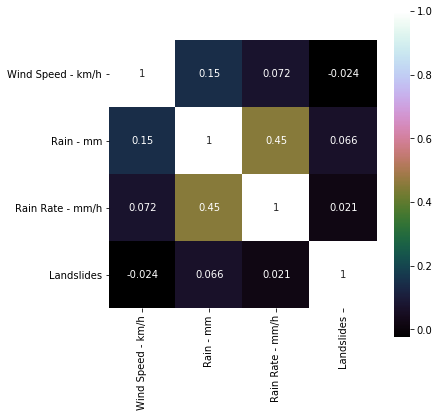

In [40]:
print('# Landslide happened = {}'.format(len(final_data[final_data['Landslides'] == 1])))
print('# Landslide not happen = {}'.format(len(final_data[final_data['Landslides'] == 0])))
print('% of landslide happen = {}%'.format(round(float(len(final_data[final_data['Landslides'] == 1])) / len(final_data) * 100), 3))
heatmaps(final_data)

### Grouped final data by each day using mean values

In [41]:
grouped_by_day_data_mean = final_data.groupby(['Date']).mean()
#grouped_by_day_data_mean

# Landslide happened = 61
# Landslide not happen = 189
% of landslide happen = 24%


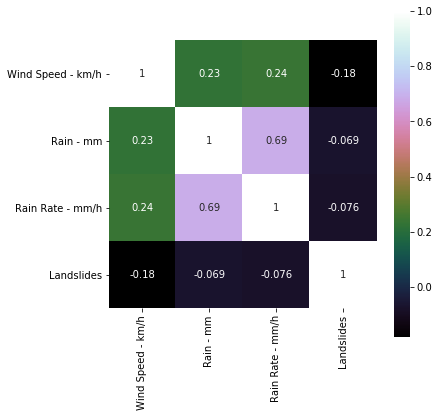

In [36]:
print('# Landslide happened = {}'.format(len(grouped_by_day_data_mean[grouped_by_day_data_mean['Landslides'] == 1])))
print('# Landslide not happen = {}'.format(len(grouped_by_day_data_mean[grouped_by_day_data_mean['Landslides'] == 0])))
print('% of landslide happen = {}%'.format(round(float(len(grouped_by_day_data_mean[grouped_by_day_data_mean['Landslides'] == 1])) / len(grouped_by_day_data_mean) * 100), 3))
heatmaps(grouped_by_day_data_mean)

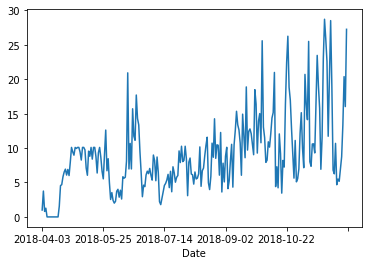

In [37]:
grouped_by_day_data_mean['Wind Speed - km/h'].plot();

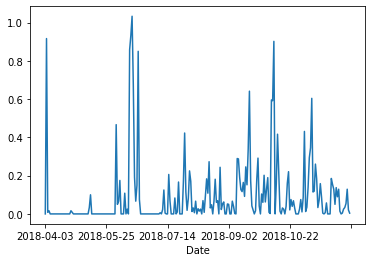

In [38]:
grouped_by_day_data_mean['Rain - mm'].plot();

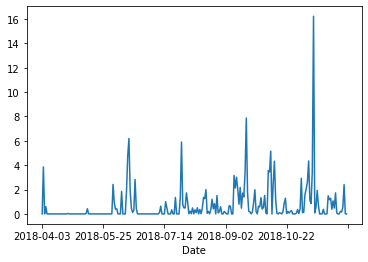

In [39]:
grouped_by_day_data_mean['Rain Rate - mm/h'].plot();

### Grouped final data by each day using sum values

In [46]:
grouped_by_day_data_sum = final_data.groupby(['Date']).sum()
grouped_by_day_data_sum = grouped_by_day_data_sum.drop('Landslides', axis=1)
grouped_by_day_data_sum['Landslides'] = grouped_by_day_data_mean['Landslides']
#grouped_by_day_data_sum

# Landslide happened = 61
# Landslide not happen = 189
% of landslide happen = 24%


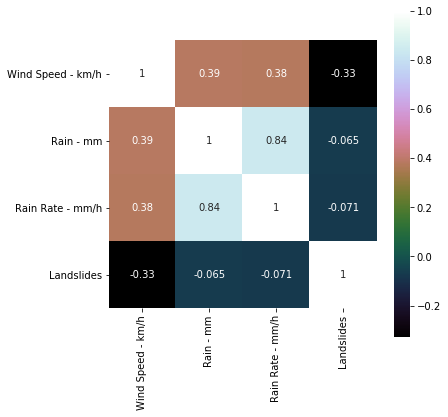

In [48]:
print('# Landslide happened = {}'.format(len(grouped_by_day_data_sum[grouped_by_day_data_sum['Landslides'] == 1])))
print('# Landslide not happen = {}'.format(len(grouped_by_day_data_sum[grouped_by_day_data_sum['Landslides'] == 0])))
print('% of landslide happen = {}%'.format(round(float(len(grouped_by_day_data_sum[grouped_by_day_data_sum['Landslides'] == 1])) / len(grouped_by_day_data_sum) * 100), 3))
heatmaps(grouped_by_day_data_sum)

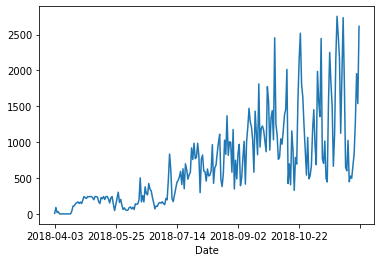

In [49]:
grouped_by_day_data_sum['Wind Speed - km/h'].plot();

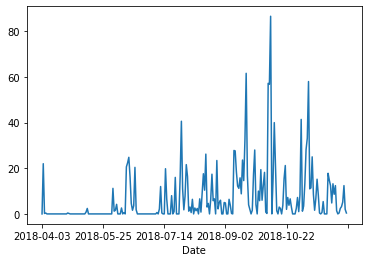

In [50]:
grouped_by_day_data_sum['Rain - mm'].plot();

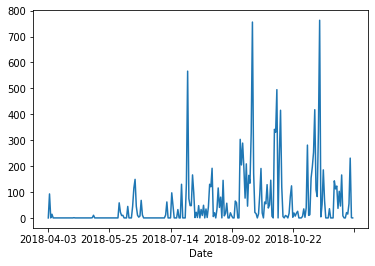

In [51]:
grouped_by_day_data_sum['Rain Rate - mm/h'].plot();

# MACHINE LEARNING MODELS

## LINEAR REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
def LR_model(train_x, test_x, train_y, test_y):
    logit_model = LogisticRegression(solver='liblinear', random_state=0)
    logit_model = logit_model.fit(train_x, train_y)
    return logit_model

In [73]:
def plot_model(cm):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()

### Logistic Regression on ungrouped data with train and test ratio 60/40

In [46]:
final_data_copy_LR = final_data.drop('Date & Time', axis=1)
final_data_copy_LR = final_data_copy_LR.drop('Date', axis=1)
#final_data_copy_LR

,Wind Speed - km/h,Rain - mm,Rain Rate - mm/h,Landslides
3,0.0,0.0,0.0,1
4,0.0,0.0,0.0,1
5,1.6,0.0,0.0,1
6,1.6,0.0,0.0,1
7,1.6,0.0,0.0,1
...,...,...,...,...
17151,27.4,0.0,0.0,0
17152,33.8,0.0,0.0,0
17153,35.4,0.0,0.0,0
17154,33.8,0.0,0.0,0


In [53]:
final_data = final_data.drop('Date & Time', axis=1)
final_data = final_data.drop('Date', axis=1)

In [56]:
train_data = final_data[['Wind Speed - km/h','Rain - mm','Rain Rate - mm/h']]
test_data = final_data[['Landslides']]

In [57]:
train_x, test_x = train_test_split(train_data, test_size=0.4)
train_y, test_y = train_test_split(test_data, test_size=0.4)

In [58]:
model = LR_model(train_x, test_x, train_y, test_y)
cm = confusion_matrix(test_y, model.predict(test_x))

C:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 
0.8731901661646099
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6025
           1       0.00      0.00      0.00       837

    accuracy                           0.88      6862
   macro avg       0.44      0.50      0.47      6862
weighted avg       0.77      0.88      0.82      6862



C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


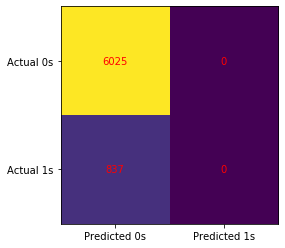

In [62]:
print("Accuracy: ")
print(model.score(train_x, train_y))
print(classification_report(test_y, model.predict(test_x)))
plot_model(cm)

### Logistic Regression on ungrouped data with train and test ratio 80/20

C:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 
0.8732692027401253
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3028
           1       0.00      0.00      0.00       403

    accuracy                           0.88      3431
   macro avg       0.44      0.50      0.47      3431
weighted avg       0.78      0.88      0.83      3431



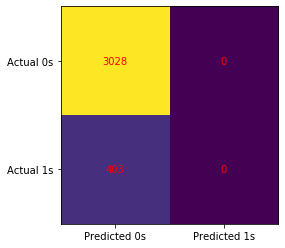

In [63]:
train_x, test_x = train_test_split(train_data, test_size=0.2)
train_y, test_y = train_test_split(test_data, test_size=0.2)

model = LR_model(train_x, test_x, train_y, test_y)
cm = confusion_matrix(test_y, model.predict(test_x))

print("Accuracy: ")
print(model.score(train_x, train_y))
print(classification_report(test_y, model.predict(test_x)))
plot_model(cm)

### Logistic Regression on grouped data using mean values with train and test ratio 60/40

Accuracy: 
0.78
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        72
           1       0.00      0.00      0.00        28

    accuracy                           0.72       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.52      0.72      0.60       100



C:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


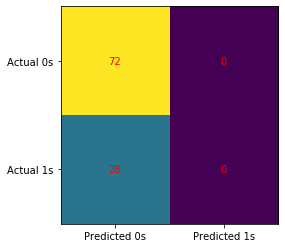

In [64]:
train_data = grouped_by_day_data_mean[['Wind Speed - km/h','Rain - mm','Rain Rate - mm/h']]
test_data = grouped_by_day_data_mean[['Landslides']]

train_x, test_x = train_test_split(train_data, test_size=0.4)
train_y, test_y = train_test_split(test_data, test_size=0.4)

model = LR_model(train_x, test_x, train_y, test_y)
cm = confusion_matrix(test_y, model.predict(test_x))

print("Accuracy: ")
print(model.score(train_x, train_y))
print(classification_report(test_y, model.predict(test_x)))
plot_model(cm)

### Logistic Regression on grouped data using mean values with train and test ratio 80/20

Accuracy: 
0.75
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        39
           1       0.00      0.00      0.00        11

    accuracy                           0.78        50
   macro avg       0.39      0.50      0.44        50
weighted avg       0.61      0.78      0.68        50



C:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


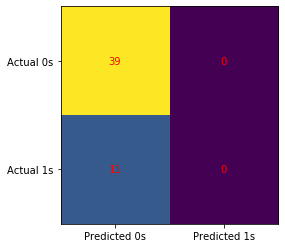

In [65]:
train_x, test_x = train_test_split(train_data, test_size=0.2)
train_y, test_y = train_test_split(test_data, test_size=0.2)

model = LR_model(train_x, test_x, train_y, test_y)
cm = confusion_matrix(test_y, model.predict(test_x))

print("Accuracy: ")
print(model.score(train_x, train_y))
print(classification_report(test_y, model.predict(test_x)))
plot_model(cm)

### Logistic Regression on grouped data using sum values with train and test ratio 60/40

Accuracy: 
0.7733333333333333
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        76
           1       0.20      0.04      0.07        24

    accuracy                           0.73       100
   macro avg       0.48      0.49      0.46       100
weighted avg       0.62      0.73      0.66       100



C:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


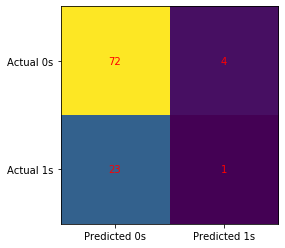

In [66]:
train_data = grouped_by_day_data_sum[['Wind Speed - km/h','Rain - mm','Rain Rate - mm/h']]
test_data = grouped_by_day_data_sum[['Landslides']]

train_x, test_x = train_test_split(train_data, test_size=0.4)
train_y, test_y = train_test_split(test_data, test_size=0.4)

model = LR_model(train_x, test_x, train_y, test_y)
cm = confusion_matrix(test_y, model.predict(test_x))

print("Accuracy: ")
print(model.score(train_x, train_y))
print(classification_report(test_y, model.predict(test_x)))
plot_model(cm)

### Logistic Regression on grouped data using sum values with train and test ratio 80/20

Accuracy: 
0.755
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        38
           1       0.00      0.00      0.00        12

    accuracy                           0.76        50
   macro avg       0.38      0.50      0.43        50
weighted avg       0.58      0.76      0.66        50



C:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


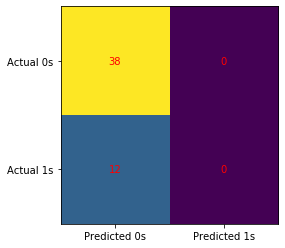

In [67]:
train_x, test_x = train_test_split(train_data, test_size=0.2)
train_y, test_y = train_test_split(test_data, test_size=0.2)

model = LR_model(train_x, test_x, train_y, test_y)
cm = confusion_matrix(test_y, model.predict(test_x))

print("Accuracy: ")
print(model.score(train_x, train_y))
print(classification_report(test_y, model.predict(test_x)))
plot_model(cm)

## RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

In [71]:
def RF_model(train_x, train_y):
    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(train_x,train_y)
    return clf

### Random Forest on ungrouped data with train and test ratio 60/40

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.8679685222967065
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      6003
           1       0.09      0.01      0.01       859

    accuracy                           0.87      6862
   macro avg       0.48      0.50      0.47      6862
weighted avg       0.78      0.87      0.81      6862



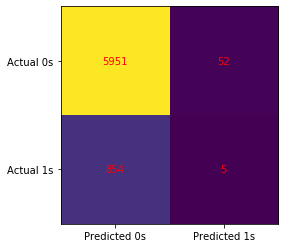

In [74]:
train_data = final_data[['Wind Speed - km/h','Rain - mm','Rain Rate - mm/h']]
test_data = final_data[['Landslides']]

train_x, test_x = train_test_split(train_data, test_size=0.4)
train_y, test_y = train_test_split(test_data, test_size=0.4)

model = RF_model(train_x,train_y)
y_pred = model.predict(test_x)
cm = confusion_matrix(test_y, y_pred)

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print(metrics.classification_report(test_y, y_pred))
plot_model(cm)

### Random Forest on ungrouped data with train and test ratio 80/20

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.8691343631594287
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2997
           1       0.00      0.00      0.00       434

    accuracy                           0.87      3431
   macro avg       0.44      0.50      0.46      3431
weighted avg       0.76      0.87      0.81      3431



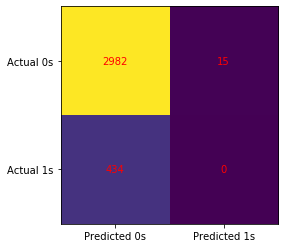

In [75]:
train_x, test_x = train_test_split(train_data, test_size=0.2)
train_y, test_y = train_test_split(test_data, test_size=0.2)

model = RF_model(train_x,train_y)
y_pred = model.predict(test_x)
cm = confusion_matrix(test_y, y_pred)

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print(metrics.classification_report(test_y, y_pred))
plot_model(cm)

### Random Forest on grouped data using mean values with train and test ratio 60/40

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        83
           1       0.00      0.00      0.00        17

    accuracy                           0.65       100
   macro avg       0.40      0.39      0.39       100
weighted avg       0.66      0.65      0.65       100



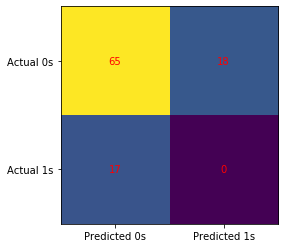

In [76]:
train_data = grouped_by_day_data_mean[['Wind Speed - km/h','Rain - mm','Rain Rate - mm/h']]
test_data = grouped_by_day_data_mean[['Landslides']]

train_x, test_x = train_test_split(train_data, test_size=0.4)
train_y, test_y = train_test_split(test_data, test_size=0.4)

model = RF_model(train_x,train_y)
y_pred = model.predict(test_x)
cm = confusion_matrix(test_y, y_pred)

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print(metrics.classification_report(test_y, y_pred))
plot_model(cm)

### Random Forest on grouped data using mean values with train and test ratio 80/20

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        34
           1       0.20      0.06      0.10        16

    accuracy                           0.62        50
   macro avg       0.43      0.47      0.43        50
weighted avg       0.52      0.62      0.55        50



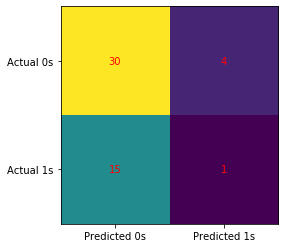

In [77]:
train_x, test_x = train_test_split(train_data, test_size=0.2)
train_y, test_y = train_test_split(test_data, test_size=0.2)

model = RF_model(train_x,train_y)
y_pred = model.predict(test_x)
cm = confusion_matrix(test_y, y_pred)

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print(metrics.classification_report(test_y, y_pred))
plot_model(cm)

### Random Forest on grouped data using sum values with train and test ratio 60/40

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        73
           1       0.25      0.11      0.15        27

    accuracy                           0.67       100
   macro avg       0.49      0.49      0.47       100
weighted avg       0.60      0.67      0.62       100



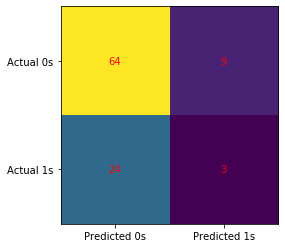

In [78]:
train_data = grouped_by_day_data_sum[['Wind Speed - km/h','Rain - mm','Rain Rate - mm/h']]
test_data = grouped_by_day_data_sum[['Landslides']]

train_x, test_x = train_test_split(train_data, test_size=0.4)
train_y, test_y = train_test_split(test_data, test_size=0.4)

model = RF_model(train_x,train_y)
y_pred = model.predict(test_x)
cm = confusion_matrix(test_y, y_pred)

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print(metrics.classification_report(test_y, y_pred))
plot_model(cm)

### Random Forest on grouped data using sum values with train and test ratio 80/20

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        45
           1       0.10      0.20      0.13         5

    accuracy                           0.74        50
   macro avg       0.50      0.50      0.49        50
weighted avg       0.82      0.74      0.78        50



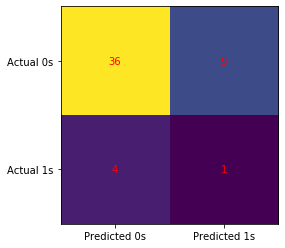

In [79]:
train_x, test_x = train_test_split(train_data, test_size=0.2)
train_y, test_y = train_test_split(test_data, test_size=0.2)

model = RF_model(train_x,train_y)
y_pred = model.predict(test_x)
cm = confusion_matrix(test_y, y_pred)

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print(metrics.classification_report(test_y, y_pred))
plot_model(cm)

# DEEP LEARNING

In [80]:
import keras as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Embedding
from keras.layers import Dropout

## FEED FORWARD NEURAL NETWORK

In [81]:
def FF_model():
    my_init = K.initializers.glorot_uniform(seed=1)
    model = K.models.Sequential()
    model.add(K.layers.Dense(units=8, input_dim=3,
        activation='tanh', kernel_initializer=my_init)) 
    model.add(K.layers.Dense(units=8, activation='tanh',
        kernel_initializer=my_init)) 
    model.add(K.layers.Dense(units=1, activation='sigmoid',
        kernel_initializer=my_init))
    simple_sgd = K.optimizers.SGD(lr=0.01)  
    model.compile(loss='binary_crossentropy',
        optimizer=simple_sgd, metrics=['accuracy']) 
    return model

In [83]:
class MyLogger(K.callbacks.Callback):
  def __init__(self, n):
    self.n = n

In [82]:
train_data = final_data[['Wind Speed - km/h','Rain - mm','Rain Rate - mm/h']]
test_data = final_data[['Landslides']]

### Feed Forward neural network on ungrouped data with train and test ratio of 60/40

In [84]:
train_x, test_x = train_test_split(train_data, test_size=0.4)
train_y, test_y = train_test_split(test_data, test_size=0.4)

model = FF_model()

max_epochs = 500
my_logger = MyLogger(n=50)
h = model.fit(train_x, train_y, batch_size=32,
  epochs=max_epochs, verbose=0, callbacks=[my_logger])

np.set_printoptions(precision=4, suppress=True)
eval_results = model.evaluate(test_x, test_y, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], \
  eval_results[1]*100))


Loss, accuracy on test data: 
0.3639 88.21%


### Feed Forward neural network on ungrouped data with train and test ratio of 80/20

In [85]:
train_x, test_x = train_test_split(train_data, test_size=0.2)
train_y, test_y = train_test_split(test_data, test_size=0.2)

model = FF_model()

max_epochs = 500
my_logger = MyLogger(n=50)
h = model.fit(train_x, train_y, batch_size=32,
  epochs=max_epochs, verbose=0, callbacks=[my_logger])

np.set_printoptions(precision=4, suppress=True)
eval_results = model.evaluate(test_x, test_y, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], \
  eval_results[1]*100))


Loss, accuracy on test data: 
0.3846 87.15%


### Feed Forward neural network on grouped data using mean values with train and test ratio of 60/40

In [87]:
train_data = grouped_by_day_data_mean[['Wind Speed - km/h','Rain - mm','Rain Rate - mm/h']]
test_data = grouped_by_day_data_mean[['Landslides']]

train_x, test_x = train_test_split(train_data, test_size=0.4)
train_y, test_y = train_test_split(test_data, test_size=0.4)

model = FF_model()

max_epochs = 500
my_logger = MyLogger(n=50)
h = model.fit(train_x, train_y, batch_size=32,
  epochs=max_epochs, verbose=0, callbacks=[my_logger])

np.set_printoptions(precision=4, suppress=True)
eval_results = model.evaluate(test_x, test_y, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], \
  eval_results[1]*100))


Loss, accuracy on test data: 
0.5114 81.00%


### Feed Forward neural network on grouped data using mean values with train and test ratio of 80/20

In [88]:
train_x, test_x = train_test_split(train_data, test_size=0.2)
train_y, test_y = train_test_split(test_data, test_size=0.2)

model = FF_model()

max_epochs = 500
my_logger = MyLogger(n=50)
h = model.fit(train_x, train_y, batch_size=32,
  epochs=max_epochs, verbose=0, callbacks=[my_logger])

np.set_printoptions(precision=4, suppress=True)
eval_results = model.evaluate(test_x, test_y, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], \
  eval_results[1]*100))


Loss, accuracy on test data: 
0.5719 74.00%


### Feed Forward neural network on grouped data using sum values with train and test ratio of 60/40

In [89]:
train_data = grouped_by_day_data_sum[['Wind Speed - km/h','Rain - mm','Rain Rate - mm/h']]
test_data = grouped_by_day_data_sum[['Landslides']]

train_x, test_x = train_test_split(train_data, test_size=0.4)
train_y, test_y = train_test_split(test_data, test_size=0.4)

model = FF_model()

max_epochs = 500
my_logger = MyLogger(n=50)
h = model.fit(train_x, train_y, batch_size=32,
  epochs=max_epochs, verbose=0, callbacks=[my_logger])

np.set_printoptions(precision=4, suppress=True)
eval_results = model.evaluate(test_x, test_y, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], \
  eval_results[1]*100))


Loss, accuracy on test data: 
0.5675 75.00%


### Feed Forward neural network on grouped data using sum values with train and test ratio of 80/20

In [90]:
train_x, test_x = train_test_split(train_data, test_size=0.2)
train_y, test_y = train_test_split(test_data, test_size=0.2)

model = FF_model()

max_epochs = 500
my_logger = MyLogger(n=50)
h = model.fit(train_x, train_y, batch_size=32,
  epochs=max_epochs, verbose=0, callbacks=[my_logger])

np.set_printoptions(precision=4, suppress=True)
eval_results = model.evaluate(test_x, test_y, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], \
  eval_results[1]*100))


Loss, accuracy on test data: 
0.6212 70.00%


## LONG SHORT-TERM MEMORY NEURAL NETWORK

In [91]:
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation

In [99]:
def LSTM_model(train_x, test_x, train_y, test_y):
    model = Sequential()
    model.add(LSTM(100, input_shape=(1, 3), return_sequences=True))
    model.add(LSTM(5, input_shape=(1, 3), return_sequences=True))
    model.add(Dense(1)) 
    model.add(Dropout(0.4))
    model.add(Activation ('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    history = model.fit(train_x,train_y,epochs=200, validation_data=(test_x,test_y))
    results = model.evaluate(test_x, test_y, verbose=0) 
    return results

In [93]:
def reshape(train_x, test_x, train_y, test_y):
    train_x = train_x.values.reshape(-1, 1, 3)
    test_x  = test_x.values.reshape(-1, 1, 3)
    train_y = train_y.values.reshape(-1, 1, 1)
    test_y = test_y.values.reshape(-1, 1, 1)
    return train_x, test_x, train_y, test_y

### Long Short-Term Memory neural network on ungrouped data with train and test ratio of 60/40

In [100]:
train_data = final_data[['Wind Speed - km/h','Rain - mm','Rain Rate - mm/h']]
test_data = final_data[['Landslides']]

train_x, test_x = train_test_split(train_data, test_size=0.4)
train_y, test_y = train_test_split(test_data, test_size=0.4)

train_x, test_x, train_y, test_y = reshape(train_x, test_x, train_y, test_y)

results = LSTM_model(train_x, test_x, train_y, test_y)
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (results[0], \
  results[1]*100))

Epoch 1/200
322/322 [==============================] - 1s 4ms/step - loss: 0.5780 - accuracy: 0.8766 - val_loss: 0.5001 - val_accuracy: 0.8712
Epoch 2/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5318 - accuracy: 0.8778 - val_loss: 0.4680 - val_accuracy: 0.8712
Epoch 3/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5208 - accuracy: 0.8778 - val_loss: 0.4550 - val_accuracy: 0.8712
Epoch 4/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5207 - accuracy: 0.8778 - val_loss: 0.4491 - val_accuracy: 0.8712
Epoch 5/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5212 - accuracy: 0.8778 - val_loss: 0.4464 - val_accuracy: 0.8712
Epoch 6/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5162 - accuracy: 0.8778 - val_loss: 0.4437 - val_accuracy: 0.8712
Epoch 7/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5128 - accuracy: 0.8778 - val_loss: 0.4409 - val_accuracy: 0.8712

Epoch 58/200
322/322 [==============================] - 1s 2ms/step - loss: 0.4999 - accuracy: 0.8778 - val_loss: 0.4260 - val_accuracy: 0.8712
Epoch 59/200
322/322 [==============================] - 1s 2ms/step - loss: 0.4981 - accuracy: 0.8778 - val_loss: 0.4255 - val_accuracy: 0.8712
Epoch 60/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5041 - accuracy: 0.8778 - val_loss: 0.4257 - val_accuracy: 0.8712
Epoch 61/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5066 - accuracy: 0.8778 - val_loss: 0.4258 - val_accuracy: 0.8712
Epoch 62/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5027 - accuracy: 0.8778 - val_loss: 0.4258 - val_accuracy: 0.8712
Epoch 63/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5002 - accuracy: 0.8778 - val_loss: 0.4253 - val_accuracy: 0.8712
Epoch 64/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5040 - accuracy: 0.8778 - val_loss: 0.4254 - val_accuracy:

Epoch 115/200
322/322 [==============================] - 1s 2ms/step - loss: 0.4965 - accuracy: 0.8778 - val_loss: 0.4236 - val_accuracy: 0.8712
Epoch 116/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5055 - accuracy: 0.8778 - val_loss: 0.4236 - val_accuracy: 0.8712
Epoch 117/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5046 - accuracy: 0.8778 - val_loss: 0.4238 - val_accuracy: 0.8712
Epoch 118/200
322/322 [==============================] - 1s 2ms/step - loss: 0.4988 - accuracy: 0.8778 - val_loss: 0.4235 - val_accuracy: 0.8712
Epoch 119/200
322/322 [==============================] - 1s 2ms/step - loss: 0.4973 - accuracy: 0.8778 - val_loss: 0.4233 - val_accuracy: 0.8712
Epoch 120/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5066 - accuracy: 0.8778 - val_loss: 0.4236 - val_accuracy: 0.8712
Epoch 121/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5017 - accuracy: 0.8778 - val_loss: 0.4235 - val_ac

322/322 [==============================] - 1s 2ms/step - loss: 0.5056 - accuracy: 0.8778 - val_loss: 0.4228 - val_accuracy: 0.8712
Epoch 172/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5014 - accuracy: 0.8778 - val_loss: 0.4228 - val_accuracy: 0.8712
Epoch 173/200
322/322 [==============================] - 1s 2ms/step - loss: 0.4972 - accuracy: 0.8778 - val_loss: 0.4226 - val_accuracy: 0.8712
Epoch 174/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5027 - accuracy: 0.8778 - val_loss: 0.4227 - val_accuracy: 0.8712
Epoch 175/200
322/322 [==============================] - 1s 2ms/step - loss: 0.4967 - accuracy: 0.8778 - val_loss: 0.4227 - val_accuracy: 0.8712
Epoch 176/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5018 - accuracy: 0.8778 - val_loss: 0.4228 - val_accuracy: 0.8712
Epoch 177/200
322/322 [==============================] - 1s 2ms/step - loss: 0.5024 - accuracy: 0.8778 - val_loss: 0.4227 - val_accuracy: 0.8712

### Long Short-Term Memory neural network on ungrouped data with train and test ratio of 80/20

In [102]:
train_x, test_x = train_test_split(train_data, test_size=0.2)
train_y, test_y = train_test_split(test_data, test_size=0.2)

train_x, test_x, train_y, test_y = reshape(train_x, test_x, train_y, test_y)

results = LSTM_model(train_x, test_x, train_y, test_y)
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (results[0], \
  results[1]*100))

Epoch 1/200
429/429 [==============================] - 2s 4ms/step - loss: 0.5584 - accuracy: 0.8736 - val_loss: 0.4694 - val_accuracy: 0.8814
Epoch 2/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5194 - accuracy: 0.8736 - val_loss: 0.4455 - val_accuracy: 0.8814
Epoch 3/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5211 - accuracy: 0.8736 - val_loss: 0.4390 - val_accuracy: 0.8814
Epoch 4/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5220 - accuracy: 0.8736 - val_loss: 0.4361 - val_accuracy: 0.8814
Epoch 5/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5198 - accuracy: 0.8736 - val_loss: 0.4337 - val_accuracy: 0.8814
Epoch 6/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5169 - accuracy: 0.8736 - val_loss: 0.4314 - val_accuracy: 0.8814
Epoch 7/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5160 - accuracy: 0.8736 - val_loss: 0.4298 - val_accuracy: 0.8814

Epoch 58/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5070 - accuracy: 0.8736 - val_loss: 0.4144 - val_accuracy: 0.8814
Epoch 59/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5093 - accuracy: 0.8736 - val_loss: 0.4147 - val_accuracy: 0.8814
Epoch 60/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5076 - accuracy: 0.8736 - val_loss: 0.4146 - val_accuracy: 0.8814
Epoch 61/200
429/429 [==============================] - 1s 3ms/step - loss: 0.5019 - accuracy: 0.8736 - val_loss: 0.4142 - val_accuracy: 0.8814
Epoch 62/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5075 - accuracy: 0.8736 - val_loss: 0.4142 - val_accuracy: 0.8814
Epoch 63/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5089 - accuracy: 0.8736 - val_loss: 0.4143 - val_accuracy: 0.8814
Epoch 64/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5077 - accuracy: 0.8736 - val_loss: 0.4142 - val_accuracy:

Epoch 115/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5126 - accuracy: 0.8736 - val_loss: 0.4129 - val_accuracy: 0.8814
Epoch 116/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5083 - accuracy: 0.8736 - val_loss: 0.4129 - val_accuracy: 0.8814
Epoch 117/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5094 - accuracy: 0.8736 - val_loss: 0.4130 - val_accuracy: 0.8814
Epoch 118/200
429/429 [==============================] - 1s 3ms/step - loss: 0.5108 - accuracy: 0.8736 - val_loss: 0.4132 - val_accuracy: 0.8814
Epoch 119/200
429/429 [==============================] - 1s 3ms/step - loss: 0.5001 - accuracy: 0.8736 - val_loss: 0.4128 - val_accuracy: 0.8814
Epoch 120/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5073 - accuracy: 0.8736 - val_loss: 0.4128 - val_accuracy: 0.8814
Epoch 121/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5067 - accuracy: 0.8736 - val_loss: 0.4127 - val_ac

429/429 [==============================] - 1s 2ms/step - loss: 0.5047 - accuracy: 0.8736 - val_loss: 0.4115 - val_accuracy: 0.8814
Epoch 172/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5074 - accuracy: 0.8736 - val_loss: 0.4116 - val_accuracy: 0.8814
Epoch 173/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5072 - accuracy: 0.8736 - val_loss: 0.4116 - val_accuracy: 0.8814
Epoch 174/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5041 - accuracy: 0.8736 - val_loss: 0.4115 - val_accuracy: 0.8814
Epoch 175/200
429/429 [==============================] - 1s 3ms/step - loss: 0.5035 - accuracy: 0.8736 - val_loss: 0.4114 - val_accuracy: 0.8814
Epoch 176/200
429/429 [==============================] - 1s 3ms/step - loss: 0.5096 - accuracy: 0.8736 - val_loss: 0.4116 - val_accuracy: 0.8814
Epoch 177/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5068 - accuracy: 0.8736 - val_loss: 0.4116 - val_accuracy: 0.8814

### Long Short-Term Memory neural network on grouped data using mean values with train and test ratio of 60/40

In [103]:
train_data = grouped_by_day_data_mean[['Wind Speed - km/h','Rain - mm','Rain Rate - mm/h']]
test_data = grouped_by_day_data_mean[['Landslides']]

train_x, test_x = train_test_split(train_data, test_size=0.4)
train_y, test_y = train_test_split(test_data, test_size=0.4)

train_x, test_x, train_y, test_y = reshape(train_x, test_x, train_y, test_y)

results = LSTM_model(train_x, test_x, train_y, test_y)
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (results[0], \
  results[1]*100))

Epoch 1/200
5/5 [==============================] - 1s 114ms/step - loss: 0.7033 - accuracy: 0.5333 - val_loss: 0.7003 - val_accuracy: 0.2800
Epoch 2/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6943 - accuracy: 0.5267 - val_loss: 0.6848 - val_accuracy: 0.8400
Epoch 3/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6886 - accuracy: 0.7000 - val_loss: 0.6777 - val_accuracy: 0.8400
Epoch 4/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6818 - accuracy: 0.7000 - val_loss: 0.6690 - val_accuracy: 0.8400
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6773 - accuracy: 0.7000 - val_loss: 0.6624 - val_accuracy: 0.8400
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6736 - accuracy: 0.7000 - val_loss: 0.6561 - val_accuracy: 0.8400
Epoch 7/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6734 - accuracy: 0.7000 - val_loss: 0.6516 - val_accuracy: 0.8400
Epoch 8/200
5/5 [========

5/5 [==============================] - 0s 7ms/step - loss: 0.6303 - accuracy: 0.7000 - val_loss: 0.5774 - val_accuracy: 0.8400
Epoch 60/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6315 - accuracy: 0.7000 - val_loss: 0.5765 - val_accuracy: 0.8400
Epoch 61/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6455 - accuracy: 0.7000 - val_loss: 0.5761 - val_accuracy: 0.8400
Epoch 62/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6332 - accuracy: 0.7000 - val_loss: 0.5753 - val_accuracy: 0.8400
Epoch 63/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6741 - accuracy: 0.7000 - val_loss: 0.5756 - val_accuracy: 0.8400
Epoch 64/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6344 - accuracy: 0.7000 - val_loss: 0.5748 - val_accuracy: 0.8400
Epoch 65/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6688 - accuracy: 0.7000 - val_loss: 0.5751 - val_accuracy: 0.8400
Epoch 66/200
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.6391 - accuracy: 0.7000 - val_loss: 0.5608 - val_accuracy: 0.8400
Epoch 118/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6534 - accuracy: 0.7000 - val_loss: 0.5608 - val_accuracy: 0.8400
Epoch 119/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6651 - accuracy: 0.7000 - val_loss: 0.5611 - val_accuracy: 0.8400
Epoch 120/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6312 - accuracy: 0.7000 - val_loss: 0.5607 - val_accuracy: 0.8400
Epoch 121/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6295 - accuracy: 0.7000 - val_loss: 0.5602 - val_accuracy: 0.8400
Epoch 122/200
5/5 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.7000 - val_loss: 0.5600 - val_accuracy: 0.8400
Epoch 123/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6423 - accuracy: 0.7000 - val_loss: 0.5600 - val_accuracy: 0.8400
Epoch 124/200
5/5 [========

5/5 [==============================] - 0s 9ms/step - loss: 0.6636 - accuracy: 0.7000 - val_loss: 0.5561 - val_accuracy: 0.8400
Epoch 176/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6289 - accuracy: 0.7000 - val_loss: 0.5558 - val_accuracy: 0.8400
Epoch 177/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6529 - accuracy: 0.7000 - val_loss: 0.5559 - val_accuracy: 0.8400
Epoch 178/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6542 - accuracy: 0.7000 - val_loss: 0.5561 - val_accuracy: 0.8400
Epoch 179/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6381 - accuracy: 0.7000 - val_loss: 0.5558 - val_accuracy: 0.8400
Epoch 180/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6368 - accuracy: 0.7000 - val_loss: 0.5557 - val_accuracy: 0.8400
Epoch 181/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6388 - accuracy: 0.7000 - val_loss: 0.5555 - val_accuracy: 0.8400
Epoch 182/200
5/5 [=======

### Long Short-Term Memory neural network on grouped data using mean values with train and test ratio of 80/20

In [104]:
train_x, test_x = train_test_split(train_data, test_size=0.2)
train_y, test_y = train_test_split(test_data, test_size=0.2)

train_x, test_x, train_y, test_y = reshape(train_x, test_x, train_y, test_y)

results = LSTM_model(train_x, test_x, train_y, test_y)
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (results[0], \
  results[1]*100))

Epoch 1/200
7/7 [==============================] - 0s 69ms/step - loss: 0.6853 - accuracy: 0.7500 - val_loss: 0.6730 - val_accuracy: 0.8000
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6804 - accuracy: 0.7450 - val_loss: 0.6669 - val_accuracy: 0.8000
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6757 - accuracy: 0.7450 - val_loss: 0.6611 - val_accuracy: 0.8000
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6642 - accuracy: 0.7450 - val_loss: 0.6559 - val_accuracy: 0.8000
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6656 - accuracy: 0.7450 - val_loss: 0.6508 - val_accuracy: 0.8000
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6666 - accuracy: 0.7450 - val_loss: 0.6473 - val_accuracy: 0.8000
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6589 - accuracy: 0.7450 - val_loss: 0.6437 - val_accuracy: 0.8000
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 6ms/step - loss: 0.6257 - accuracy: 0.7450 - val_loss: 0.5834 - val_accuracy: 0.8000
Epoch 60/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6407 - accuracy: 0.7450 - val_loss: 0.5831 - val_accuracy: 0.8000
Epoch 61/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6404 - accuracy: 0.7450 - val_loss: 0.5829 - val_accuracy: 0.8000
Epoch 62/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6357 - accuracy: 0.7450 - val_loss: 0.5825 - val_accuracy: 0.8000
Epoch 63/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6286 - accuracy: 0.7450 - val_loss: 0.5819 - val_accuracy: 0.8000
Epoch 64/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6332 - accuracy: 0.7450 - val_loss: 0.5814 - val_accuracy: 0.8000
Epoch 65/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6269 - accuracy: 0.7450 - val_loss: 0.5812 - val_accuracy: 0.8000
Epoch 66/200
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 0.6255 - accuracy: 0.7450 - val_loss: 0.5759 - val_accuracy: 0.8000
Epoch 118/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6229 - accuracy: 0.7450 - val_loss: 0.5758 - val_accuracy: 0.8000
Epoch 119/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6304 - accuracy: 0.7450 - val_loss: 0.5755 - val_accuracy: 0.8000
Epoch 120/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6247 - accuracy: 0.7450 - val_loss: 0.5753 - val_accuracy: 0.8000
Epoch 121/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6049 - accuracy: 0.7450 - val_loss: 0.5753 - val_accuracy: 0.8000
Epoch 122/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6184 - accuracy: 0.7450 - val_loss: 0.5754 - val_accuracy: 0.8000
Epoch 123/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6068 - accuracy: 0.7450 - val_loss: 0.5749 - val_accuracy: 0.8000
Epoch 124/200
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.6392 - accuracy: 0.7450 - val_loss: 0.5703 - val_accuracy: 0.8000
Epoch 176/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5980 - accuracy: 0.7450 - val_loss: 0.5702 - val_accuracy: 0.8000
Epoch 177/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6391 - accuracy: 0.7450 - val_loss: 0.5703 - val_accuracy: 0.8000
Epoch 178/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6222 - accuracy: 0.7450 - val_loss: 0.5701 - val_accuracy: 0.8000
Epoch 179/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6277 - accuracy: 0.7450 - val_loss: 0.5703 - val_accuracy: 0.8000
Epoch 180/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6362 - accuracy: 0.7450 - val_loss: 0.5707 - val_accuracy: 0.8000
Epoch 181/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6214 - accuracy: 0.7450 - val_loss: 0.5705 - val_accuracy: 0.8000
Epoch 182/200
7/7 [========

### Long Short-Term Memory neural network on grouped data using sum values with train and test ratio of 60/40

In [105]:
train_data = grouped_by_day_data_mean[['Wind Speed - km/h','Rain - mm','Rain Rate - mm/h']]
test_data = grouped_by_day_data_mean[['Landslides']]

train_x, test_x = train_test_split(train_data, test_size=0.4)
train_y, test_y = train_test_split(test_data, test_size=0.4)

train_x, test_x, train_y, test_y = reshape(train_x, test_x, train_y, test_y)

results = LSTM_model(train_x, test_x, train_y, test_y)
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (results[0], \
  results[1]*100))

Epoch 1/200
5/5 [==============================] - 1s 116ms/step - loss: 0.6841 - accuracy: 0.7733 - val_loss: 0.6826 - val_accuracy: 0.7200
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 0.6757 - accuracy: 0.7867 - val_loss: 0.6782 - val_accuracy: 0.7200
Epoch 3/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6666 - accuracy: 0.7867 - val_loss: 0.6745 - val_accuracy: 0.7200
Epoch 4/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6706 - accuracy: 0.7867 - val_loss: 0.6723 - val_accuracy: 0.7200
Epoch 5/200
5/5 [==============================] - 0s 13ms/step - loss: 0.6662 - accuracy: 0.7867 - val_loss: 0.6702 - val_accuracy: 0.7100
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6611 - accuracy: 0.7867 - val_loss: 0.6681 - val_accuracy: 0.7100
Epoch 7/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6576 - accuracy: 0.7867 - val_loss: 0.6662 - val_accuracy: 0.7100
Epoch 8/200
5/5 [===

5/5 [==============================] - 0s 8ms/step - loss: 0.6041 - accuracy: 0.7867 - val_loss: 0.6278 - val_accuracy: 0.7100
Epoch 60/200
5/5 [==============================] - 0s 9ms/step - loss: 0.5868 - accuracy: 0.7867 - val_loss: 0.6274 - val_accuracy: 0.7100
Epoch 61/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6183 - accuracy: 0.7867 - val_loss: 0.6272 - val_accuracy: 0.7100
Epoch 62/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5825 - accuracy: 0.7867 - val_loss: 0.6268 - val_accuracy: 0.7100
Epoch 63/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5897 - accuracy: 0.7867 - val_loss: 0.6265 - val_accuracy: 0.7100
Epoch 64/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6278 - accuracy: 0.7867 - val_loss: 0.6264 - val_accuracy: 0.7100
Epoch 65/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6103 - accuracy: 0.7867 - val_loss: 0.6261 - val_accuracy: 0.7100
Epoch 66/200
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.6154 - accuracy: 0.7867 - val_loss: 0.6192 - val_accuracy: 0.7100
Epoch 118/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5950 - accuracy: 0.7867 - val_loss: 0.6192 - val_accuracy: 0.7100
Epoch 119/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5766 - accuracy: 0.7867 - val_loss: 0.6191 - val_accuracy: 0.7100
Epoch 120/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5862 - accuracy: 0.7867 - val_loss: 0.6190 - val_accuracy: 0.7100
Epoch 121/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5670 - accuracy: 0.7867 - val_loss: 0.6189 - val_accuracy: 0.7100
Epoch 122/200
5/5 [==============================] - 0s 6ms/step - loss: 0.6227 - accuracy: 0.7867 - val_loss: 0.6188 - val_accuracy: 0.7100
Epoch 123/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5887 - accuracy: 0.7867 - val_loss: 0.6188 - val_accuracy: 0.7100
Epoch 124/200
5/5 [========

5/5 [==============================] - 0s 9ms/step - loss: 0.5843 - accuracy: 0.7867 - val_loss: 0.6164 - val_accuracy: 0.7100
Epoch 176/200
5/5 [==============================] - 0s 9ms/step - loss: 0.5952 - accuracy: 0.7867 - val_loss: 0.6164 - val_accuracy: 0.7100
Epoch 177/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5760 - accuracy: 0.7867 - val_loss: 0.6164 - val_accuracy: 0.7100
Epoch 178/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5870 - accuracy: 0.7867 - val_loss: 0.6163 - val_accuracy: 0.7100
Epoch 179/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5922 - accuracy: 0.7867 - val_loss: 0.6163 - val_accuracy: 0.7100
Epoch 180/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5915 - accuracy: 0.7867 - val_loss: 0.6163 - val_accuracy: 0.7100
Epoch 181/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5410 - accuracy: 0.7867 - val_loss: 0.6162 - val_accuracy: 0.7100
Epoch 182/200
5/5 [========

### Long Short-Term Memory neural network on grouped data using sum values with train and test ratio of 80/20

In [106]:
train_x, test_x = train_test_split(train_data, test_size=0.2)
train_y, test_y = train_test_split(test_data, test_size=0.2)

train_x, test_x, train_y, test_y = reshape(train_x, test_x, train_y, test_y)

results = LSTM_model(train_x, test_x, train_y, test_y)
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (results[0], \
  results[1]*100))

Epoch 1/200
7/7 [==============================] - 1s 71ms/step - loss: 0.6746 - accuracy: 0.7300 - val_loss: 0.6525 - val_accuracy: 0.8600
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6655 - accuracy: 0.7300 - val_loss: 0.6419 - val_accuracy: 0.8600
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6654 - accuracy: 0.7300 - val_loss: 0.6351 - val_accuracy: 0.8600
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6523 - accuracy: 0.7300 - val_loss: 0.6277 - val_accuracy: 0.8600
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6492 - accuracy: 0.7300 - val_loss: 0.6224 - val_accuracy: 0.8600
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6425 - accuracy: 0.7300 - val_loss: 0.6162 - val_accuracy: 0.8600
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6466 - accuracy: 0.7300 - val_loss: 0.6126 - val_accuracy: 0.8600
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 0.6380 - accuracy: 0.7300 - val_loss: 0.5515 - val_accuracy: 0.8600
Epoch 60/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6331 - accuracy: 0.7300 - val_loss: 0.5514 - val_accuracy: 0.8600
Epoch 61/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6210 - accuracy: 0.7300 - val_loss: 0.5507 - val_accuracy: 0.8600
Epoch 62/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6426 - accuracy: 0.7300 - val_loss: 0.5508 - val_accuracy: 0.8600
Epoch 63/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6365 - accuracy: 0.7300 - val_loss: 0.5505 - val_accuracy: 0.8600
Epoch 64/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6178 - accuracy: 0.7300 - val_loss: 0.5498 - val_accuracy: 0.8600
Epoch 65/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6495 - accuracy: 0.7300 - val_loss: 0.5496 - val_accuracy: 0.8600
Epoch 66/200
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 0.6261 - accuracy: 0.7300 - val_loss: 0.5386 - val_accuracy: 0.8600
Epoch 118/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6151 - accuracy: 0.7300 - val_loss: 0.5385 - val_accuracy: 0.8600
Epoch 119/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6091 - accuracy: 0.7300 - val_loss: 0.5379 - val_accuracy: 0.8600
Epoch 120/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6369 - accuracy: 0.7300 - val_loss: 0.5380 - val_accuracy: 0.8600
Epoch 121/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6233 - accuracy: 0.7300 - val_loss: 0.5377 - val_accuracy: 0.8600
Epoch 122/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6395 - accuracy: 0.7300 - val_loss: 0.5379 - val_accuracy: 0.8600
Epoch 123/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6258 - accuracy: 0.7300 - val_loss: 0.5375 - val_accuracy: 0.8600
Epoch 124/200
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 0.6232 - accuracy: 0.7300 - val_loss: 0.5364 - val_accuracy: 0.8600
Epoch 176/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6099 - accuracy: 0.7300 - val_loss: 0.5359 - val_accuracy: 0.8600
Epoch 177/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6246 - accuracy: 0.7300 - val_loss: 0.5355 - val_accuracy: 0.8600
Epoch 178/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6338 - accuracy: 0.7300 - val_loss: 0.5354 - val_accuracy: 0.8600
Epoch 179/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6412 - accuracy: 0.7300 - val_loss: 0.5357 - val_accuracy: 0.8600
Epoch 180/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6523 - accuracy: 0.7300 - val_loss: 0.5363 - val_accuracy: 0.8600
Epoch 181/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6123 - accuracy: 0.7300 - val_loss: 0.5358 - val_accuracy: 0.8600
Epoch 182/200
7/7 [========